In [1]:
!pip install datasets
from datasets import load_dataset

ds = load_dataset("JLB-JLB/seizure_eeg_dev")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/620 [00:00<?, ?B/s]

(…)-00000-of-00007-78d1928c4e4c8738.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

(…)-00001-of-00007-c211d8658c1f7928.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

(…)-00002-of-00007-80729869c4e6afed.parquet:   0%|          | 0.00/482M [00:00<?, ?B/s]

(…)-00003-of-00007-83ab5d435e4c3478.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

(…)-00004-of-00007-509d76e95160285f.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

(…)-00005-of-00007-78c53e4b09ae386d.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

(…)-00006-of-00007-f50222fd5ef44ce6.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/114035 [00:00<?, ? examples/s]

In [2]:
ds.shape

{'train': (114035, 3)}

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'epoch', 'label'],
        num_rows: 114035
    })
})

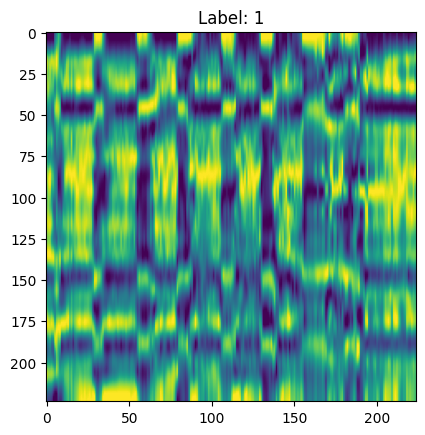

In [4]:
import matplotlib.pyplot as plt
image = ds['train'][190]['image']
label = ds['train'][190]['label']

plt.imshow(image)
plt.title(f"Label: {label}")
plt.show()

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

(224, 224)


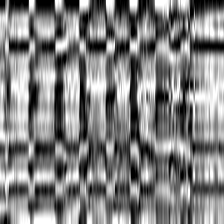

In [6]:
image= ds['train'][190]['image']
image= np.array(image)
print(image.shape)
cv2_imshow(image)

(224, 224)


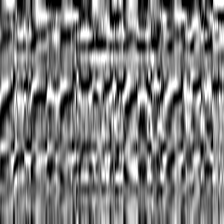

In [7]:
image= ds['train'][116]['image']
image= np.array(image)
print(image.shape)
cv2_imshow(image)

In [8]:
ds['train'].shape

(114035, 3)

In [9]:
ds.shape

{'train': (114035, 3)}

In [10]:
ds['train'][1450]['label']

1

In [11]:
# Define a function to update the labels
def update_labels(example):
    # Merge labels 0 and 1 to 0, and change label 2 to 1
    if example['label'] in [0, 1]:
        example['label'] = 0
    elif example['label'] == 2:
        example['label'] = 1
    return example

# Apply the label transformation to the 'train' split
ds['train'] = ds['train'].map(update_labels)

Map:   0%|          | 0/114035 [00:00<?, ? examples/s]

In [12]:
from collections import Counter
labels= ds['train']['label']
# Use Counter to count occurrences of each label
label_counts = Counter(labels)
print(label_counts)

Counter({0: 106580, 1: 7455})


In [13]:
import random
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict, concatenate_datasets

# Extract the data for both labels
class_0_data = ds['train'].filter(lambda example: example['label'] == 0)
class_1_data = ds['train'].filter(lambda example: example['label'] == 1)

# random.seed(42)  # For reproducibility
class_0_sampled = class_0_data.shuffle(seed=42).select(range(len(class_1_data)))

balanced_dataset = concatenate_datasets([class_0_sampled, class_1_data]).shuffle(seed=42)

class_0_count = len(class_0_sampled)
class_1_count = len(class_1_data)
print(f"Class 0 count: {class_0_count}")
print(f"Class 1 count: {class_1_count}")

balanced_dataset = concatenate_datasets([class_0_sampled, class_1_data]).shuffle(seed=42)
print(balanced_dataset.shape)

# First, split into 90% train+val and 10% test
train_val_test = balanced_dataset.train_test_split(test_size=0.1, seed=42)
train_val_data = train_val_test['train']
test_data = train_val_test['test']

# Now split the 90% into 70% train and 20% validation
train_val_split = train_val_data.train_test_split(test_size=0.2, seed=42)
train_data = train_val_split['train']
val_data = train_val_split['test']

# Create a DatasetDict
dataset_dict = DatasetDict({
    'train': train_data,
    'val': val_data,
    'test': test_data
})

print(dataset_dict['train'].shape)
print(dataset_dict['val'].shape)
print(dataset_dict['test'].shape)

Filter:   0%|          | 0/114035 [00:00<?, ? examples/s]

Filter:   0%|          | 0/114035 [00:00<?, ? examples/s]

Class 0 count: 7455
Class 1 count: 7455
(14910, 3)
(10735, 3)
(2684, 3)
(1491, 3)


In [14]:
from torch.utils.data import Dataset
# Define a custom dataset class to handle your Hugging Face dataset
class EEGDataset(Dataset):
    def __init__(self, dataset_dict, split, transform=None):
        self.dataset = dataset_dict[split]
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Extract the image and label from the Hugging Face dataset
        image = self.dataset[idx]['image']
        label = self.dataset[idx]['label']

        # Apply any transformations (e.g., resizing, normalization)
        if self.transform:
            image = self.transform(image)

        return image, label

In [15]:
from torchvision import transforms

# Define image transformations
transform = transforms.Compose([
    transforms.Grayscale(),  # Convert to grayscale if not already
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize grayscale image
])

In [16]:
class_names= ['No Seizures', 'Seizure']

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [18]:
# size calculation
def cnn_size_calc(n, k, s, p):
    return ((n - k + 2*p)/s) + 1
cnn_size_calc(112, 3, 1, 1)

112.0

In [19]:
112/2/2

28.0

In [20]:
# Define the CNN Model
class SeizureDetectionCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SeizureDetectionCNN, self).__init__()
        self.conv1= nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1) # 32, 224, 224

        self.pool= nn.MaxPool2d(kernel_size=2, stride=2) # 32, 112, 112

        self.conv2= nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # 64, 112, 112 -> 64, 56, 56
        self.conv3= nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1) # 128, 56, 56 -> 128, 28, 28
        self.conv4= nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1) # 256, 28, 28 -> 256, 14, 14

        # Adding Batch Normalization
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)

        self.dropout = nn.Dropout(p=0.5)  # Dropout with a probability of 50%

        self.fc1= nn.Linear(256*14*14, 120)
        self.fc2= nn.Linear(120, 32)
        self.fc3= nn.Linear(32, num_classes)

    def forward(self, x):
        # x = self.pool(F.relu(self.conv1(x)))
        # x = self.pool(F.relu(self.conv2(x)))
        # x = self.pool(F.relu(self.conv3(x)))
        # x = self.pool(F.relu(self.conv4(x)))
        # x = torch.flatten(x, 1)
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        # return x
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # 32, 112, 112
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # 64, 56, 56
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # 128, 28, 28
        x = self.pool(F.relu(self.bn4(self.conv4(x))))  # 256, 14, 14

        x = torch.flatten(x, 1)
        x = self.dropout(F.relu(self.fc1(x)))  # Apply dropout
        x = self.dropout(F.relu(self.fc2(x)))  # Apply dropout
        x = self.fc3(x)
        return x

In [21]:
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming you have defined your model as 'SeizureDetectionCNN'
model = SeizureDetectionCNN().to(device)

# You need to specify the input size for the summary
# (assuming your input image size is 256x256x1)
image_size = np.array(dataset_dict['train'][0]['image']).shape
print(image_size)

# Print the model summary
# summary(model, image_size)
summary(model, input_size=(1, 224, 224))

(224, 224)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             320
       BatchNorm2d-2         [-1, 32, 224, 224]              64
         MaxPool2d-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 64, 112, 112]          18,496
       BatchNorm2d-5         [-1, 64, 112, 112]             128
         MaxPool2d-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]          73,856
       BatchNorm2d-8          [-1, 128, 56, 56]             256
         MaxPool2d-9          [-1, 128, 28, 28]               0
           Conv2d-10          [-1, 256, 28, 28]         295,168
      BatchNorm2d-11          [-1, 256, 28, 28]             512
        MaxPool2d-12          [-1, 256, 14, 14]               0
           Linear-13                  [-1, 120]       6,021,240
          Dropout-14        

In [22]:
train_loader= EEGDataset(dataset_dict, 'train', transform)
val_loader= EEGDataset(dataset_dict, 'val', transform)
test_loader= EEGDataset(dataset_dict, 'test', transform)

In [23]:
train_loader= DataLoader(train_loader, batch_size=32, shuffle=True)
val_loader= DataLoader(val_loader, batch_size=32, shuffle=True)
test_loader= DataLoader(test_loader, batch_size=32, shuffle=True)

In [24]:
train_loader.dataset.__getitem__(0)[0].shape

torch.Size([1, 224, 224])

In [25]:
# epochs= 20
# net= SeizureDetectionCNN().to(device)
# optimizer= optim.Adam(net.parameters(), lr=0.001)
# criterion= nn.CrossEntropyLoss()

# for epoch in range(epochs):
#   print(f"training epoch {epoch+1}...")

#   running_loss= 0.0

#   for i, data in enumerate(train_loader):
#     inputs, labels= data
#     inputs, labels= inputs.to(device), labels.to(device)
#     optimizer.zero_grad()

#     outputs= net(inputs)
#     loss= criterion(outputs, labels)
#     loss.backward()
#     optimizer.step()

#     running_loss += loss.item()

#   print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming you have your dataset and model defined as 'SeizureDetectionCNN'
# Initialize model, optimizer, criterion, and device
epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SeizureDetectionCNN().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Lists to store losses and accuracies
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [36]:
# Early stopping class to monitor validation loss and stop training if no improvement
class EarlyStopping:
    def __init__(self, patience=5, delta=0.001, path='checkpoint.pt', verbose=False):
        self.patience = patience
        self.delta = delta
        self.path = path
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model = None

    def __call__(self, val_loss, model):
        # If first validation loss, set it as the best loss
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        # If current loss is not improved enough
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            # Save the previous best loss for printing
            old_best_loss = self.best_loss
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            if self.verbose:
                print(f"Validation loss decreased ({old_best_loss:.6f} --> {val_loss:.6f}). Saving model...")
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """Save the best model checkpoint"""
        torch.save(model.state_dict(), self.path)
        self.best_model = model

Training epoch 1...


100%|██████████| 336/336 [00:56<00:00,  5.96it/s]


Epoch 1, Train Loss: 0.8235, Train Accuracy: 0.5594, Val Loss: 0.6603, Val Accuracy: 0.5943
Training epoch 2...


100%|██████████| 336/336 [00:55<00:00,  6.08it/s]


Epoch 2, Train Loss: 0.6518, Train Accuracy: 0.5939, Val Loss: 0.6162, Val Accuracy: 0.6457
Validation loss decreased (0.660315 --> 0.616180). Saving model...
Training epoch 3...


100%|██████████| 336/336 [00:55<00:00,  6.04it/s]


Epoch 3, Train Loss: 0.6405, Train Accuracy: 0.6084, Val Loss: 0.6015, Val Accuracy: 0.6744
Validation loss decreased (0.616180 --> 0.601512). Saving model...
Training epoch 4...


100%|██████████| 336/336 [00:54<00:00,  6.20it/s]


Epoch 4, Train Loss: 0.6240, Train Accuracy: 0.6457, Val Loss: 0.5681, Val Accuracy: 0.7034
Validation loss decreased (0.601512 --> 0.568068). Saving model...
Training epoch 5...


100%|██████████| 336/336 [00:57<00:00,  5.79it/s]


Epoch 5, Train Loss: 0.6013, Train Accuracy: 0.6774, Val Loss: 0.5364, Val Accuracy: 0.7366
Validation loss decreased (0.568068 --> 0.536432). Saving model...
Training epoch 6...


100%|██████████| 336/336 [00:53<00:00,  6.29it/s]


Epoch 6, Train Loss: 0.5736, Train Accuracy: 0.6946, Val Loss: 0.5515, Val Accuracy: 0.7295
EarlyStopping counter: 1 out of 5
Training epoch 7...


100%|██████████| 336/336 [00:52<00:00,  6.36it/s]


Epoch 7, Train Loss: 0.5580, Train Accuracy: 0.7091, Val Loss: 0.5778, Val Accuracy: 0.7038
EarlyStopping counter: 2 out of 5
Training epoch 8...


100%|██████████| 336/336 [00:53<00:00,  6.33it/s]


Epoch 8, Train Loss: 0.5514, Train Accuracy: 0.7176, Val Loss: 0.5241, Val Accuracy: 0.7615
Validation loss decreased (0.536432 --> 0.524144). Saving model...
Training epoch 9...


100%|██████████| 336/336 [00:52<00:00,  6.41it/s]


Epoch 9, Train Loss: 0.5382, Train Accuracy: 0.7273, Val Loss: 0.5072, Val Accuracy: 0.7690
Validation loss decreased (0.524144 --> 0.507151). Saving model...
Training epoch 10...


100%|██████████| 336/336 [00:54<00:00,  6.21it/s]


Epoch 10, Train Loss: 0.5296, Train Accuracy: 0.7332, Val Loss: 0.4753, Val Accuracy: 0.7936
Validation loss decreased (0.507151 --> 0.475252). Saving model...
Training epoch 11...


100%|██████████| 336/336 [00:53<00:00,  6.32it/s]


Epoch 11, Train Loss: 0.5204, Train Accuracy: 0.7429, Val Loss: 0.4787, Val Accuracy: 0.7861
EarlyStopping counter: 1 out of 5
Training epoch 12...


100%|██████████| 336/336 [00:53<00:00,  6.29it/s]


Epoch 12, Train Loss: 0.5090, Train Accuracy: 0.7519, Val Loss: 0.4481, Val Accuracy: 0.8085
Validation loss decreased (0.475252 --> 0.448137). Saving model...
Training epoch 13...


100%|██████████| 336/336 [00:52<00:00,  6.36it/s]


Epoch 13, Train Loss: 0.4949, Train Accuracy: 0.7689, Val Loss: 0.4490, Val Accuracy: 0.8077
EarlyStopping counter: 1 out of 5
Training epoch 14...


100%|██████████| 336/336 [00:53<00:00,  6.30it/s]


Epoch 14, Train Loss: 0.4857, Train Accuracy: 0.7744, Val Loss: 0.4459, Val Accuracy: 0.8122
Validation loss decreased (0.448137 --> 0.445930). Saving model...
Training epoch 15...


100%|██████████| 336/336 [00:53<00:00,  6.33it/s]


Epoch 15, Train Loss: 0.4799, Train Accuracy: 0.7751, Val Loss: 0.4243, Val Accuracy: 0.8268
Validation loss decreased (0.445930 --> 0.424265). Saving model...
Training epoch 16...


100%|██████████| 336/336 [00:53<00:00,  6.28it/s]


Epoch 16, Train Loss: 0.4727, Train Accuracy: 0.7832, Val Loss: 0.4401, Val Accuracy: 0.8096
EarlyStopping counter: 1 out of 5
Training epoch 17...


100%|██████████| 336/336 [00:52<00:00,  6.37it/s]


Epoch 17, Train Loss: 0.4623, Train Accuracy: 0.7883, Val Loss: 0.4467, Val Accuracy: 0.8014
EarlyStopping counter: 2 out of 5
Training epoch 18...


100%|██████████| 336/336 [00:52<00:00,  6.38it/s]


Epoch 18, Train Loss: 0.4544, Train Accuracy: 0.7948, Val Loss: 0.4009, Val Accuracy: 0.8268
Validation loss decreased (0.424265 --> 0.400909). Saving model...
Training epoch 19...


100%|██████████| 336/336 [00:52<00:00,  6.37it/s]


Epoch 19, Train Loss: 0.4498, Train Accuracy: 0.7972, Val Loss: 0.3959, Val Accuracy: 0.8349
Validation loss decreased (0.400909 --> 0.395904). Saving model...
Training epoch 20...


100%|██████████| 336/336 [00:52<00:00,  6.39it/s]


Epoch 20, Train Loss: 0.4370, Train Accuracy: 0.8076, Val Loss: 0.3881, Val Accuracy: 0.8409
Validation loss decreased (0.395904 --> 0.388117). Saving model...
Training epoch 21...


100%|██████████| 336/336 [00:53<00:00,  6.32it/s]


Epoch 21, Train Loss: 0.4229, Train Accuracy: 0.8160, Val Loss: 0.3752, Val Accuracy: 0.8566
Validation loss decreased (0.388117 --> 0.375194). Saving model...
Training epoch 22...


100%|██████████| 336/336 [00:52<00:00,  6.38it/s]


Epoch 22, Train Loss: 0.4022, Train Accuracy: 0.8298, Val Loss: 0.3893, Val Accuracy: 0.8517
EarlyStopping counter: 1 out of 5
Training epoch 23...


100%|██████████| 336/336 [00:53<00:00,  6.29it/s]


Epoch 23, Train Loss: 0.4062, Train Accuracy: 0.8284, Val Loss: 0.3797, Val Accuracy: 0.8431
EarlyStopping counter: 2 out of 5
Training epoch 24...


100%|██████████| 336/336 [00:52<00:00,  6.41it/s]


Epoch 24, Train Loss: 0.4055, Train Accuracy: 0.8259, Val Loss: 0.3975, Val Accuracy: 0.8342
EarlyStopping counter: 3 out of 5
Training epoch 25...


100%|██████████| 336/336 [00:52<00:00,  6.34it/s]


Epoch 25, Train Loss: 0.3886, Train Accuracy: 0.8384, Val Loss: 0.3764, Val Accuracy: 0.8383
EarlyStopping counter: 4 out of 5
Training epoch 26...


100%|██████████| 336/336 [00:52<00:00,  6.45it/s]


Epoch 26, Train Loss: 0.3770, Train Accuracy: 0.8431, Val Loss: 0.3629, Val Accuracy: 0.8566
Validation loss decreased (0.375194 --> 0.362879). Saving model...
Training epoch 27...


100%|██████████| 336/336 [00:52<00:00,  6.35it/s]


Epoch 27, Train Loss: 0.3765, Train Accuracy: 0.8421, Val Loss: 0.3683, Val Accuracy: 0.8454
EarlyStopping counter: 1 out of 5
Training epoch 28...


100%|██████████| 336/336 [00:52<00:00,  6.37it/s]


Epoch 28, Train Loss: 0.3737, Train Accuracy: 0.8448, Val Loss: 0.3584, Val Accuracy: 0.8633
Validation loss decreased (0.362879 --> 0.358438). Saving model...
Training epoch 29...


100%|██████████| 336/336 [00:52<00:00,  6.35it/s]


Epoch 29, Train Loss: 0.3547, Train Accuracy: 0.8587, Val Loss: 0.3658, Val Accuracy: 0.8588
EarlyStopping counter: 1 out of 5
Training epoch 30...


100%|██████████| 336/336 [00:52<00:00,  6.39it/s]


Epoch 30, Train Loss: 0.3571, Train Accuracy: 0.8572, Val Loss: 0.3670, Val Accuracy: 0.8592
EarlyStopping counter: 2 out of 5
Training epoch 31...


100%|██████████| 336/336 [00:52<00:00,  6.42it/s]


Epoch 31, Train Loss: 0.3451, Train Accuracy: 0.8620, Val Loss: 0.3903, Val Accuracy: 0.8592
EarlyStopping counter: 3 out of 5
Training epoch 32...


100%|██████████| 336/336 [00:53<00:00,  6.30it/s]


Epoch 32, Train Loss: 0.3414, Train Accuracy: 0.8658, Val Loss: 0.4840, Val Accuracy: 0.8372
EarlyStopping counter: 4 out of 5
Training epoch 33...


100%|██████████| 336/336 [00:52<00:00,  6.35it/s]


Epoch 33, Train Loss: 0.3322, Train Accuracy: 0.8662, Val Loss: 0.3634, Val Accuracy: 0.8577
EarlyStopping counter: 5 out of 5
Early stopping triggered. Restoring the best model...


<ipython-input-37-ae62acde8975>:81: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(early_stopping.path))


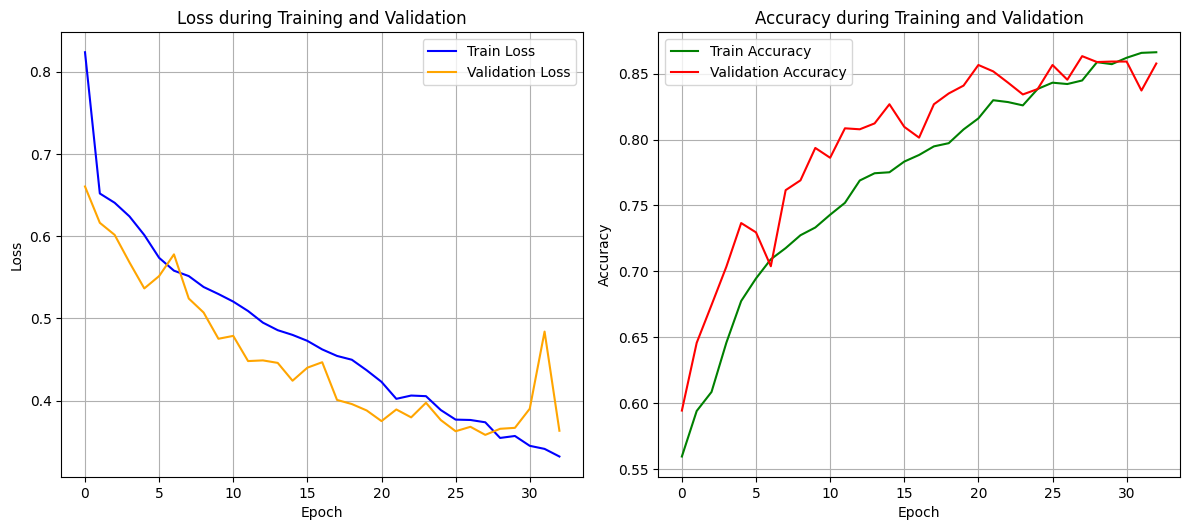

In [37]:
# Early stopping initialization
early_stopping = EarlyStopping(patience=5, verbose=True)

# Function for validation
def validate_model(model, val_loader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Accumulate loss
            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)  # Get the predicted classes
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # Count correct predictions

    epoch_loss = running_loss / len(val_loader)
    epoch_accuracy = correct / total
    return epoch_loss, epoch_accuracy

# Training loop
for epoch in range(epochs):
    print(f"Training epoch {epoch + 1}...")

    net.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Use tqdm to visualize training progress
    for i, data in tqdm(enumerate(train_loader), total=len(train_loader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted classes
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Count correct predictions

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total

    # Validation step
    val_loss, val_accuracy = validate_model(net, val_loader, criterion, device)

    # Store losses and accuracies
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Early stopping check
    early_stopping(val_loss, net)

    if early_stopping.early_stop:
        print("Early stopping triggered. Restoring the best model...")
        net.load_state_dict(torch.load(early_stopping.path))
        break

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 10))

# Plot Train Loss and Val Loss
plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Loss during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

# Plot Train Accuracy and Val Accuracy
plt.subplot(2, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', color='green')
plt.plot(val_accuracies, label='Validation Accuracy', color='red')
plt.title('Accuracy during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.tight_layout()
# save the plot figure
plt.savefig("training_validation_results.png")
plt.show()

In [38]:
torch.save(net.state_dict(), 'seizure_detection_model.pth')

from safetensors.torch import save_file

save_file(net.state_dict(), 'seizure_detection_model.safetensors')

In [39]:
# prompt: save the model as a pickefile

import pickle

# Save the model as a pickle file
with open('seizure_detection_model.pkl', 'wb') as f:
    pickle.dump(net, f)

In [ ]:
# prompt: eval the model using the test_loader

# Evaluation on the test set
def evaluate_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)  # Get the predicted classes
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # Count correct predictions

    test_accuracy = correct / total
    return test_accuracy

# Load the saved model (replace with your model loading method if necessary)
# net = SeizureDetectionCNN().to(device)
# net.load_state_dict(torch.load('seizure_detection_model.pth'))

# Evaluate the model
test_accuracy = evaluate_model(net, test_loader, device)

print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8605


In [40]:
## CONCRETE-ML FHE

# CONCRETE-ML FHE

In [41]:
!pip install concrete-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 5.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 678.1/678.1 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.

In [42]:
def test_with_concrete(quantized_module, test_loader, use_sim):
    """Test a neural network that is quantized and compiled with Concrete ML."""

    # Casting the inputs into int64 is recommended
    all_y_pred = np.zeros((len(test_loader)), dtype=np.int64)
    all_targets = np.zeros((len(test_loader)), dtype=np.int64)

    # Iterate over the test batches and accumulate predictions and ground truth labels in a vector
    idx = 0
    for data, target in tqdm(test_loader):
        data = data.numpy()
        target = target.numpy()

        fhe_mode = "simulate" if use_sim else "execute"

        # Quantize the inputs and cast to appropriate data type
        y_pred = quantized_module.forward(data, fhe=fhe_mode)

        endidx = idx + target.shape[0]

        # Accumulate the ground truth labels
        all_targets[idx:endidx] = target

        # Get the predicted class id and accumulate the predictions
        y_pred = np.argmax(y_pred, axis=1)
        all_y_pred[idx:endidx] = y_pred

        # Update the index
        idx += target.shape[0]

    # Compute and report results
    n_correct = np.sum(all_targets == all_y_pred)

    return n_correct / len(test_loader)

In [ ]:
from concrete.ml.torch.compile import compile_torch_model
n_bits = 6

q_module = compile_torch_model(net, x_train, rounding_threshold_bits=6, p_error=0.1)

start_time = time.time()
accs = test_with_concrete(
    q_module,
    test_dataloader,
    use_sim=True,
)
sim_time = time.time() - start_time

print(f"Simulated FHE execution for {n_bits} bit network accuracy: {accs:.2f}%")